# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 2. Import Dataset

In [2]:
df = pd.read_csv('data/house_price.csv', index_col= 'ID')

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
df = df.rename(columns= {'black': 'b'})

# 3. Exploratory Data Analysis (EDA)

### Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     333 non-null    float64
 1   zn       333 non-null    float64
 2   indus    333 non-null    float64
 3   chas     333 non-null    int64  
 4   nox      333 non-null    float64
 5   rm       333 non-null    float64
 6   age      333 non-null    float64
 7   dis      333 non-null    float64
 8   rad      333 non-null    int64  
 9   tax      333 non-null    int64  
 10  ptratio  333 non-null    float64
 11  b        333 non-null    float64
 12  lstat    333 non-null    float64
 13  medv     333 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 39.0 KB


In [5]:
df.shape

(333, 14)

### Check Missing Value

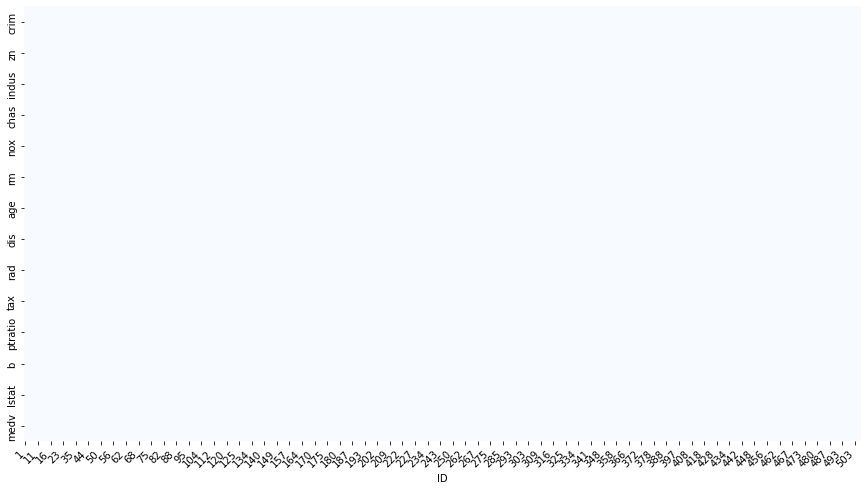

In [6]:
plot_missing_value(df)

`The dataset is clean from missing value`

### Data Description

In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


## A. Numerical Features

### Target Variable Distribution

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medv', ylabel='Density'>

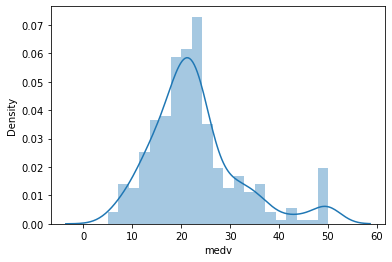

In [8]:
sns.distplot(df['medv'], kde = True)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='medv'>

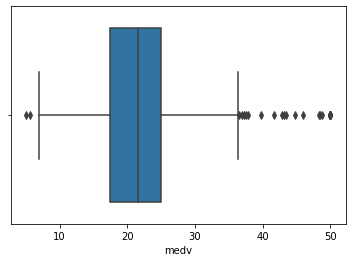

In [9]:
sns.boxplot(df['medv'])

### Numeric Variable Distribution

In [10]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

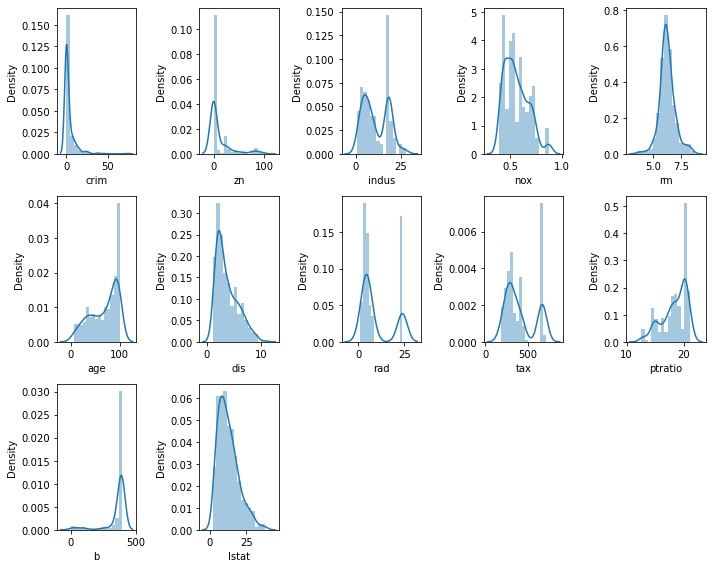

In [11]:
numeric = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
           'ptratio', 'b', 'lstat']

x = plt.figure(figsize=(10, 8))

for i, j in enumerate(numeric):
    x.add_subplot(3, 5, i+1)
    sns.distplot(df[j], bins=15)
    x.tight_layout()

plt.tight_layout()

`Although several columns have a skew, I don't handle it because maybe the number of value supposed to be. But, if the model has higher value of error, I'll handle that in the evaluation part.`

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

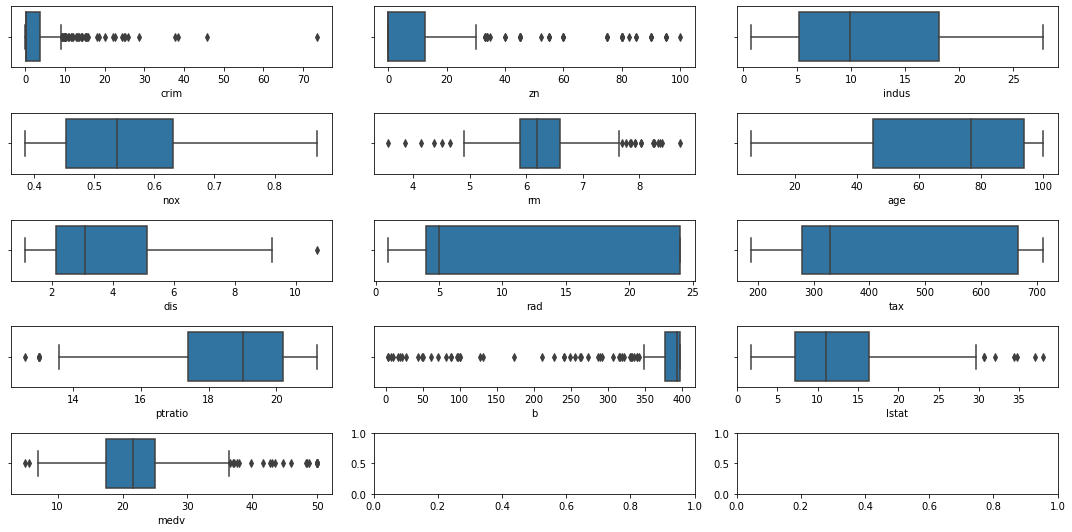

In [12]:
fig, axs = plt.subplots(5,3, figsize = (15,7.5))
sns.boxplot(df['crim'], ax = axs[0,0])
sns.boxplot(df['zn'], ax = axs[0,1])
sns.boxplot(df['indus'], ax = axs[0,2])
sns.boxplot(df['nox'], ax = axs[1,0])
sns.boxplot(df['rm'], ax = axs[1,1])
sns.boxplot(df['age'], ax = axs[1,2])
sns.boxplot(df['dis'], ax = axs[2,0])
sns.boxplot(df['rad'], ax = axs[2,1])
sns.boxplot(df['tax'], ax = axs[2,2])
sns.boxplot(df['ptratio'], ax = axs[3,0])
sns.boxplot(df['b'], ax = axs[3,1])
sns.boxplot(df['lstat'], ax = axs[3,2])
sns.boxplot(df['medv'], ax = axs[4,0])


plt.tight_layout()
plt.show()

`Although many columns have outliers, I don’t handle them yet because the values might supposed to be like that. But, if the model has higher value of error, I’ll handle in the evaluation part`

## Correlation Matrix

In [13]:
from jcopml.plot import plot_correlation_matrix

In [14]:
plot_correlation_matrix(df,target_col='medv', numeric_col='auto')

interactive(children=(ToggleButtons(description='method', options=('spearman', 'kendall', 'pearson', 'pearson_…

`Because Github can't display the correlation plot, I've captured a picture of it.`

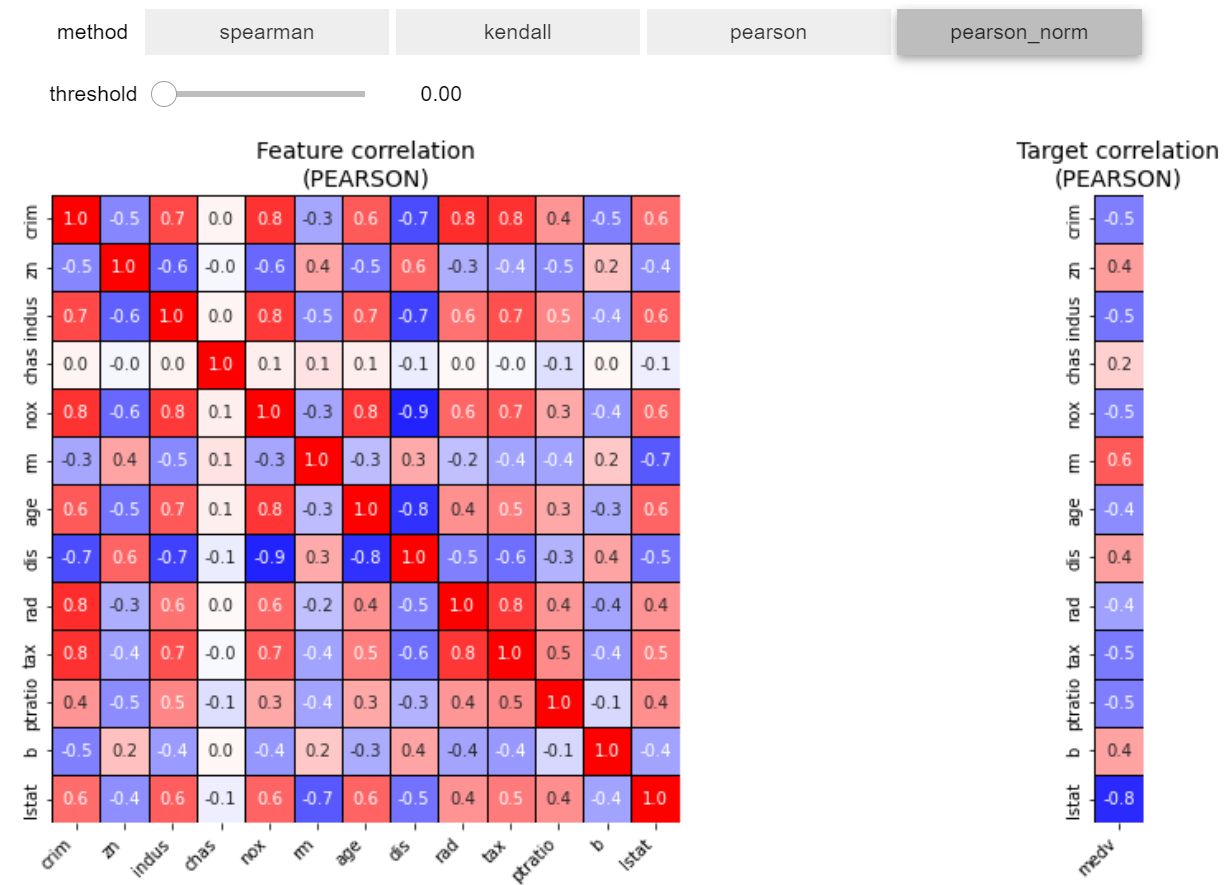

`The plot of the correlation matrix explains several columns have a strong positive and negative correlation on the target variable by using Pearson normalization. I set a threshold is 0.5`

**Positive Correlation**
1. rm

**Negatvie Correlation**
1. crim
2. indus
3. tax
4. ptratio
5. lstat

## Positive Correlation

### rm vs medv

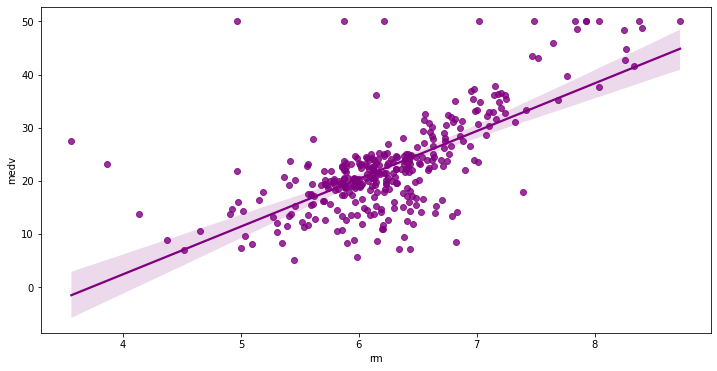

In [15]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='rm', y = 'medv', color= 'purple', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

## Negative Correlation

### crim vs medv

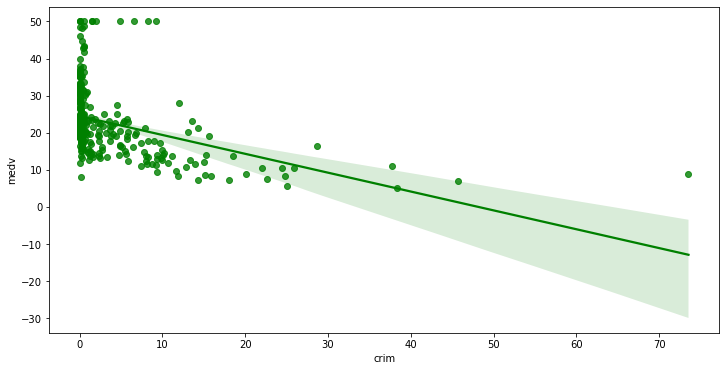

In [16]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='crim', y = 'medv', color= 'g', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### indus vs medv

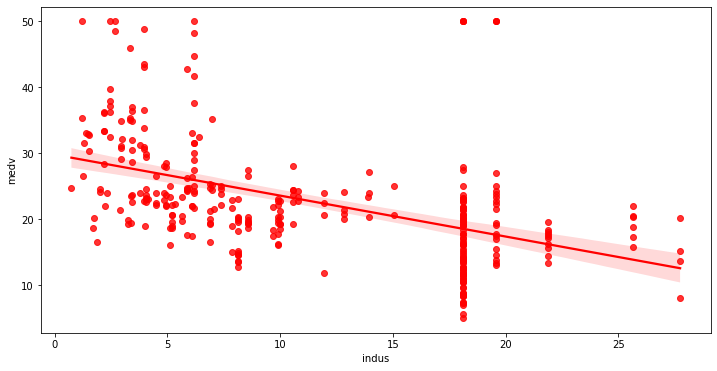

In [17]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='indus', y = 'medv', color= 'r', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### tax vs medv

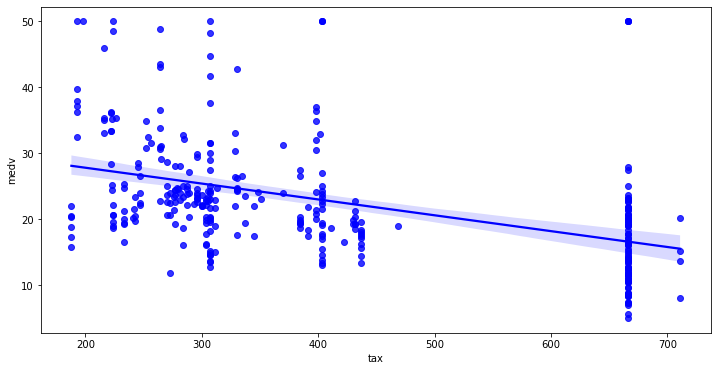

In [18]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='tax', y = 'medv', color= 'b', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### ptratio vs medv

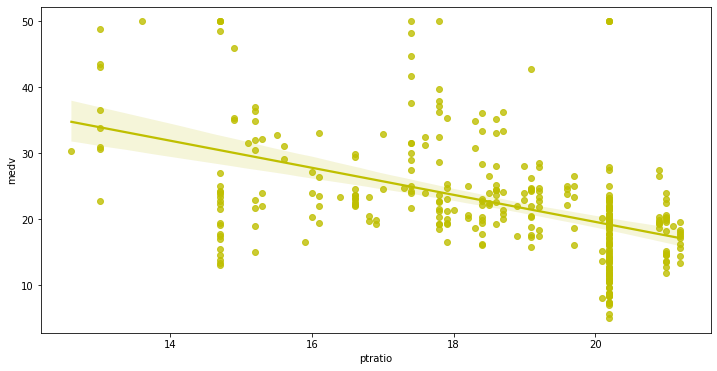

In [19]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='ptratio', y = 'medv', color= 'y', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### lstat vs medv

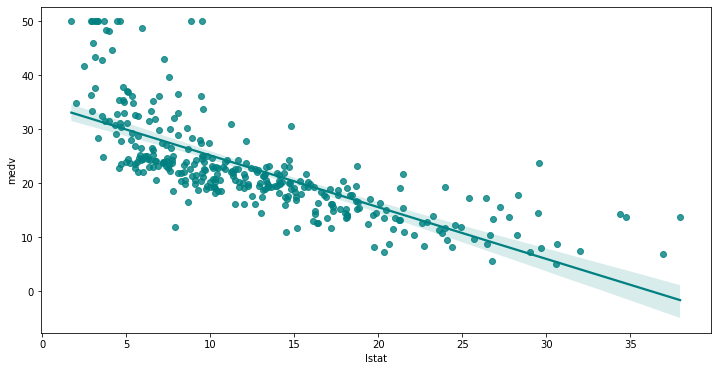

In [20]:
plt.figure(figsize=(12, 6))
plot = sns.regplot(x='lstat', y = 'medv', color= 'teal', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

## B. Categorical Features

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chas', ylabel='count'>

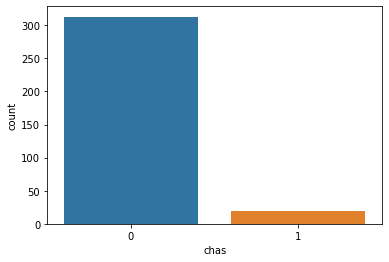

In [21]:
sns.countplot('chas', data = df)

**Insight**

`1. More houses not crossed by the charles river` <br>

# 4. Dataset Splitting

In [22]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [23]:
X = df.drop(columns="medv")
y = df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((266, 13), (67, 13), (266,), (67,))

# 5. Modeling

In [24]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [25]:
X_train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [26]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling= 'robust'), ['crim', 'zn', 'indus','nox', 'rm', 'age', 'dis', 'rad', 'tax',
                                             'ptratio', 'b', 'lstat']),
    ('categoric1', cat_pipe(encoder='onehot'), ['chas'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


model = RandomizedSearchCV(pipeline, rsp.svm_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__C': 417.2342315150455, 'algo__gamma': 0.006685373335828938}
0.8380094372703468 0.7681793883495439 0.8518379362479434


C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


# 6. Feature Importance

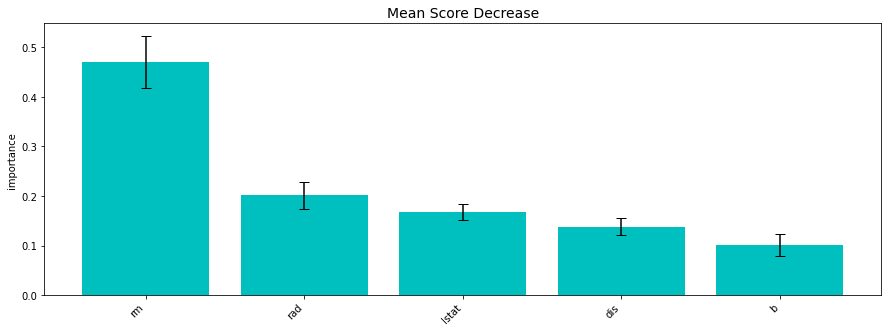

In [27]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=5)

`Lower status of population have a higher influence for house price in Boston.`

In [28]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust'), ['rm', 'rad', 'lstat', 'dis', 'b'])])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


model = RandomizedSearchCV(pipeline, rsp.svm_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__C': 278.8681037423124, 'algo__gamma': 0.03131506913881626}
0.8098462790314696 0.7814251768004319 0.8762947871031961


C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


`Feature Importance can be increasing the test score model`

# 7. Polynomial Features

In [29]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust', poly=3), ['rm', 'rad', 'lstat', 'dis', 'b'])])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


model = RandomizedSearchCV(pipeline, rsp.svm_poly_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__C': 274.23716496047416, 'algo__gamma': 0.004647130771751146, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': True}
0.8675523015034603 0.8052692827346902 0.8510154041081742


C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


`Polynomial feature has decreased test scores more than models that don't.`

# 8. Fine Tuning

In [30]:
from jcopml.tuning.space import Integer, Real

In [31]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust'), ['rm', 'rad', 'lstat', 'dis', 'b'])])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


parameter = {'algo__gamma': Real(low=-4, high=0, prior='log-uniform'),
             'algo__C': Real(low=-4, high=3, prior='log-uniform')}

model = RandomizedSearchCV(pipeline, parameter, cv=5,  n_iter=150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__C': 175.5197073995364, 'algo__gamma': 0.033462201030483814}
0.8178273445082521 0.7789537724196648 0.8873001751692572


C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


# 9. Evaluation 

In [32]:
from jcopml.plot import plot_residual
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


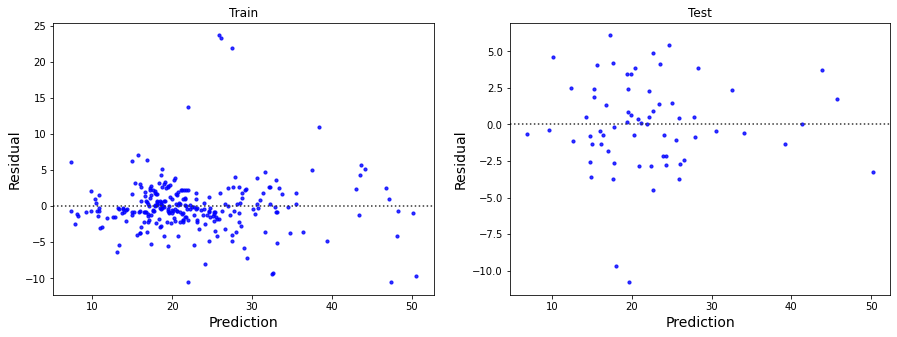

In [33]:
plot_residual(X_train, y_train, X_test, y_test, model)

`The residual plot figures out the dataset has an outlier that causes the data not being spreaded equally. This problem can be handled by transforming the data by using yeo-johnson`

## Error Checking

In [34]:
df_analysis1 = X_test.copy()
df_analysis1['pred']  = model.predict(X_test)
df_analysis1['actual'] = y_test
df_analysis1['error'] = np.abs(df_analysis1.pred - df_analysis1.actual)
df_analysis1.sort_values('error', ascending=False).head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,pred,actual,error
ID,,,,,,,,,,,,,,,,
385,20.08490,0.0,18.10,0,0.7000,4.368,91.2,1.4395,24,666,20.2,285.83,30.63,19.614854,8.8,10.814854
491,0.20746,0.0,27.74,0,0.6090,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,17.972499,8.1,9.872499
162,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,43.896481,50.0,6.103519
267,0.78570,20.0,3.97,0,0.6470,7.014,84.6,2.1329,5,264,13.0,384.07,14.79,24.728176,30.7,5.971824
173,0.13914,0.0,4.05,0,0.5100,5.572,88.5,2.5961,5,296,16.6,396.90,14.69,17.236614,23.1,5.863386
408,11.95110,0.0,18.10,0,0.6590,5.608,100.0,1.2852,24,666,20.2,332.09,12.13,22.691699,27.9,5.208301
65,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,28.292780,33.0,4.707220
214,0.14052,0.0,10.59,0,0.4890,6.375,32.3,3.9454,4,277,18.6,385.81,9.38,23.555882,28.1,4.544118
167,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,45.716931,50.0,4.283069


`There is no significant error values to be handled`

In [35]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust',transform= 'yeo-johnson'), ['rm', 'rad', 'lstat', 'dis', 'b'])])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


parameter = {'algo__gamma': Real(low=-4, high=0, prior='log-uniform'),
             'algo__C': Real(low=-4, high=3, prior='log-uniform')}

model = RandomizedSearchCV(pipeline, parameter, cv=5,  n_iter=150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

C:\Users\Malik Afu Hamid\AppData\Roaming\Python\Python39\site-packages\jcopml\pipeline\_pipeline.py:65: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__C': 110.0839441018131, 'algo__gamma': 0.03113095956122125}
0.8667593841544861 0.8210092990146464 0.8975651922099425


C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


`Transform by yeo-johnson can increase test score model`

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


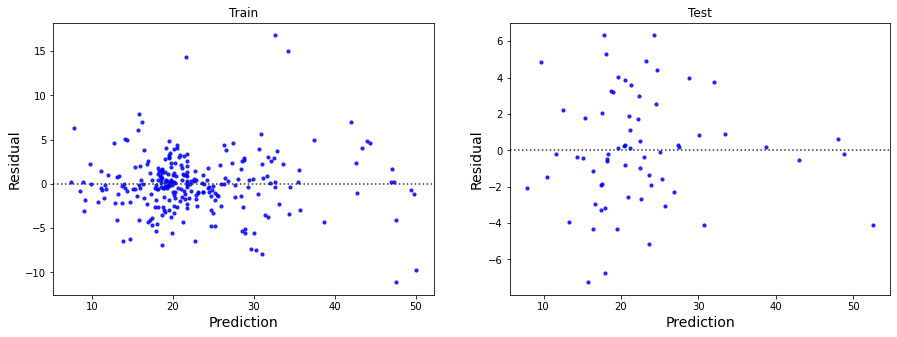

In [36]:
plot_residual(X_train, y_train, X_test, y_test, model)

`Transform the data by using yeo-johnson can spread data residual equally than before`

# 10. Summary Result

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('R2 Train :', r2_score(y_train, y_pred_train))
print('R2 Test :', r2_score(y_test, y_pred_test))
print('MAE Train :', mean_absolute_error(y_train, y_pred_train))
print('MAE Test :', mean_absolute_error(y_test, y_pred_test))
print('MSE Train :', mean_squared_error(y_train, y_pred_train))
print('MSE Test :', mean_squared_error(y_test, y_pred_test))
print('RMSE Train :', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE Test :', mean_squared_error(y_test, y_pred_test, squared=False))

R2 Train : 0.8667593841544861
R2 Test : 0.8975651922099425
MAE Train : 2.284567963215865
MAE Test : 2.4346498913949097
MSE Train : 10.967613503206595
MSE Test : 9.218967034652835
RMSE Train : 3.3117387431991965
RMSE Test : 3.0362751908634427


# 11. Save Model

In [39]:
save_model(model.best_estimator_, "The_Boston_Housing_Price_Prediction_Support_Vector_Regressor.pkl")

Model is pickled as model/The_Boston_Housing_Price_Prediction_Support_Vector_Regressor.pkl


____

# Try to Binning Feature

In [40]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     333 non-null    float64
 1   zn       333 non-null    float64
 2   indus    333 non-null    float64
 3   chas     333 non-null    int64  
 4   nox      333 non-null    float64
 5   rm       333 non-null    float64
 6   age      333 non-null    float64
 7   dis      333 non-null    float64
 8   rad      333 non-null    int64  
 9   tax      333 non-null    int64  
 10  ptratio  333 non-null    float64
 11  b        333 non-null    float64
 12  lstat    333 non-null    float64
 13  medv     333 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.1 KB


## 1. Binning tax Column

In [42]:
df['tax'] = pd.cut(df.tax, bins = np.arange(100, 750, 125), labels = ['Low', 'Medium Low', 'Medium', 'Medium High', 'High'])

In [43]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,Medium Low,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,Medium Low,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,Low,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,Low,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,Medium Low,15.2,395.60,12.43,22.9


## 2. Dataset Splitting

In [44]:
X = df.drop(columns="medv")
y = df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((266, 13), (67, 13), (266,), (67,))

## 3. Modeling

In [45]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [46]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling= 'robust'), ['crim', 'zn', 'indus','nox', 'rm', 'age', 'dis', 'rad', 
                                             'ptratio', 'b', 'lstat']),
    ('categoric', cat_pipe(encoder='onehot'), ['chas','tax'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


model = RandomizedSearchCV(pipeline, rsp.svm_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__C': 417.2342315150455, 'algo__gamma': 0.006685373335828938}
0.8383558806313155 0.768630777503867 0.8422593555671127


C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


## 4. Feature Importance

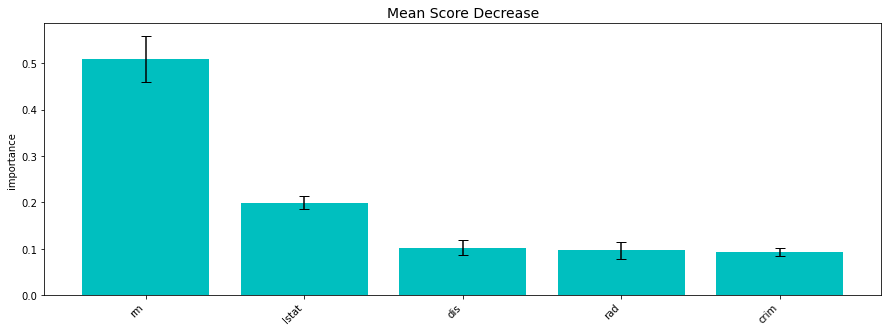

In [47]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=5)

In [48]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling= 'robust'), ['rm', 'lstat', 'dis', 'rad','crim'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


model = RandomizedSearchCV(pipeline, rsp.svm_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__C': 127.88512405449823, 'algo__gamma': 0.07971352803055304}
0.8632391104340458 0.758065144028469 0.8462625409679836


C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


`So Feature Importance can be increasing test score model`

## 5. Polynomial Feature

In [49]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling= 'robust', poly=3), ['rm', 'lstat', 'dis', 'rad','crim'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


model = RandomizedSearchCV(pipeline, rsp.svm_poly_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__C': 191.49604631846822, 'algo__gamma': 0.02630941321925394, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': True}
0.9209728592942976 0.8029644132165931 0.8068707411943881


C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


`Polynomial feature has decreased test scores more than models that don't`

## 6. Fine Tuning

In [50]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling= 'robust'), ['rm', 'lstat', 'dis', 'rad','crim'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


parameter = {'algo__gamma': Real(low=-5, high=2, prior='log-uniform'),
             'algo__C': Real(low=-5, high=2, prior='log-uniform')}

model = RandomizedSearchCV(pipeline, parameter, cv=5,  n_iter=150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__C': 17.69754353853323, 'algo__gamma': 0.05962051091940076}
0.7907433481164308 0.7501122626189629 0.8797984267029262


C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


## 7. Evaluation 

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


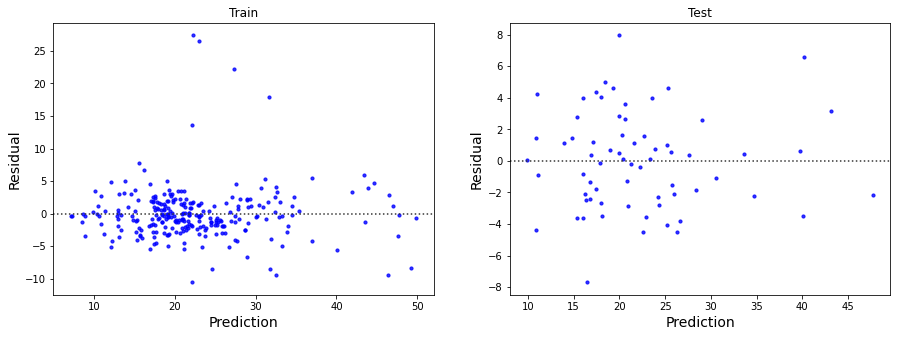

In [51]:
plot_residual(X_train, y_train, X_test, y_test, model)

`The residual plot is good enough without transform the data.`

### Error Checking

In [52]:
df_analysis1 = X_test.copy()
df_analysis1['pred']  = model.predict(X_test)
df_analysis1['actual'] = y_test
df_analysis1['error'] = np.abs(df_analysis1.pred - df_analysis1.actual)
df_analysis1.sort_values('error').head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,pred,actual,error
ID,,,,,,,,,,,,,,,,
117,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,Medium,17.8,393.30,12.04,21.239151,21.2,0.039151
445,12.80230,0.0,18.10,0,0.740,5.854,96.6,1.8956,24,High,20.2,240.52,23.79,10.871889,10.8,0.071889
88,0.07151,0.0,4.49,0,0.449,6.121,56.8,3.7476,3,Medium Low,18.5,395.15,8.44,22.276158,22.2,0.076158
432,10.06230,0.0,18.10,0,0.584,6.833,94.3,2.0882,24,High,20.2,81.33,19.69,13.961616,14.1,0.138384
477,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,High,20.2,396.21,18.68,16.840287,16.7,0.140287
190,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,Medium,15.2,396.90,5.39,34.759321,34.9,0.140679
485,2.37857,0.0,18.10,0,0.583,5.871,41.9,3.7240,24,High,20.2,370.73,13.34,20.427727,20.6,0.172273
181,0.06588,0.0,2.46,0,0.488,7.765,83.3,2.7410,3,Low,17.8,395.56,7.56,40.112868,39.8,0.312868
108,0.13117,0.0,8.56,0,0.520,6.127,85.2,2.1224,5,Medium,20.9,387.69,14.09,19.951218,20.4,0.448782


## 8. Summary Result

In [53]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('R2 Train :', r2_score(y_train, y_pred_train))
print('R2 Test :', r2_score(y_test, y_pred_test))
print('MAE Train :', mean_absolute_error(y_train, y_pred_train))
print('MAE Test :', mean_absolute_error(y_test, y_pred_test))
print('MSE Train :', mean_squared_error(y_train, y_pred_train))
print('MSE Test :', mean_squared_error(y_test, y_pred_test))
print('RMSE Train :', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE Test :', mean_squared_error(y_test, y_pred_test, squared=False))

R2 Train : 0.7907433481164308
R2 Test : 0.8797984267029262
MAE Train : 2.4769460397282437
MAE Test : 2.5687129619973854
MSE Train : 17.22482342392525
MSE Test : 10.817947196330735
RMSE Train : 4.15027992115294
RMSE Test : 3.289064790534041


`So binning feature can help to increse the model performance.`

## 9. Save Model

In [54]:
save_model(model.best_estimator_, "The_Boston_Housing_Price_Prediction_Support_Vector_Regressor_with_Binning.pkl")

Model is pickled as model/The_Boston_Housing_Price_Prediction_Support_Vector_Regressor_with_Binning.pkl
